# Support Vector Machine Assignment-1

Q1. What is the mathematical formula for a linear SVM?

The goal of a linear SVM is to find the optimal separating hyperplane that maximizes the margin between the two classes. This hyperplane can be represented by the equation:



f(x)=w 
T
 x+b=0

Q2. What is the objective function of a linear SVM?

The objective function of a linear Support Vector Machine (SVM) is typically formulated as the minimization of a certain cost function, which aims to find the optimal separating hyperplane that maximizes the margin between the two classes.

min 
w,b
​
  
1/2
​
 ∣∣w∣∣ 
2

Q3. What is the kernel trick in SVM?


The kernel trick in SVM is a method to implicitly map data into higher-dimensional spaces without actually performing the transformation explicitly. It allows SVMs to find nonlinear decision boundaries efficiently by computing similarities between data points using kernel functions, avoiding the need for costly computations in higher-dimensional spaces.






Q4. What is the role of support vectors in SVM Explain with example

Support vectors are the data points closest to the decision boundary in an SVM. They define the boundary's position and orientation, optimize the margin, and are crucial for classification.

Example:

In an SVM tasked with classifying images of cats and dogs, support vectors are the images closest to the decision boundary between the two classes. These images play a pivotal role in determining the optimal boundary for classification, ensuring accurate predictions.













Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

1) Hyperplane:

. Decision boundary separating classes.

. Example: A line dividing cats and dogs in a 2D space.

2) Marginal Plane:

. Boundary parallel to the hyperplane, touching support vectors.

. Determines the margin.

. Example: Dashed lines parallel to the hyperplane in a graph.

3) Hard Margin:

. Maximum margin with no data points violating it.

. Example: A rigid boundary in a linearly separable dataset.

4) Soft Margin:

. Allows some margin violations for better generalization.

. Controlled by a regularization parameter (C).

. Example: Margin boundaries may encompass a few data points.

Q6. SVM Implementation through Iris dataset.

In [1]:
# Here i am importing dataset

from sklearn import datasets

In [2]:
data = datasets.load_iris()

In [3]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df["Target"] = data.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

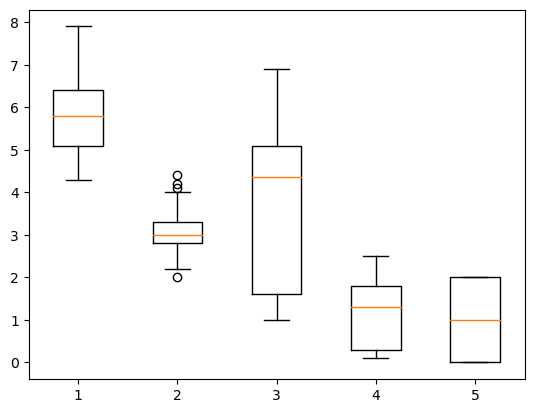

In [13]:
plt.boxplot(df)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [15]:
X = df.drop("Target",axis=1)
y = df["Target"]

In [17]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [20]:
svm_clf = SVC(kernel = "linear")

svm_clf.fit(X_train , y_train)

SVC(kernel='linear')

In [22]:
y_pred = svm_clf.predict(X_test)

In [26]:
accuracy = accuracy_score(y_pred , y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


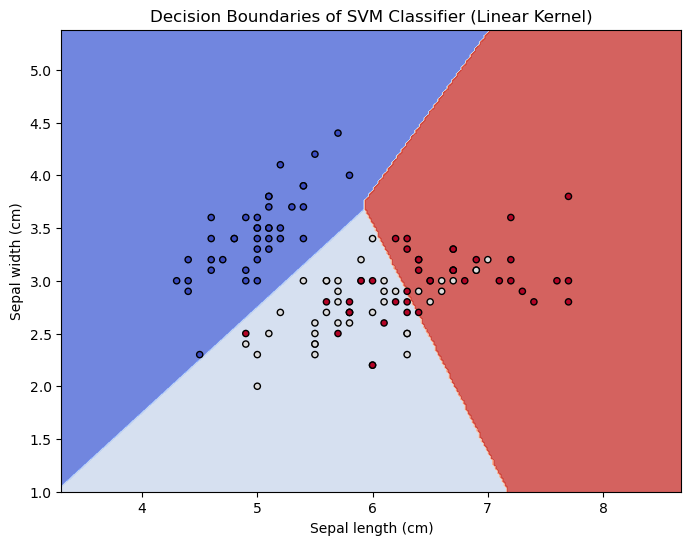

In [30]:
X = df[['sepal length (cm)', 'sepal width (cm)']].values
y = df['Target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Define a function to plot decision boundaries
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.title('Decision Boundaries of SVM Classifier (Linear Kernel)')

# Plot decision boundary using two features
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_train, y_train, svm_clf)
plt.show()


In [37]:
# Try different values of the regularisation parameter C and see how it affects the performance of the model 
# Try different values of the regularization parameter C and see how it affects the performance of the model
C_values = [0.1, 1, 10, 100]
for C in C_values:
    svm_clf = SVC(kernel='linear', C=C)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy with C={}: {}".format(C, accuracy))

Accuracy with C=0.1: 0.8333333333333334
Accuracy with C=1: 0.9
Accuracy with C=10: 0.9
Accuracy with C=100: 0.9
